AutoRegression (AR), Integrated (I), Moving Average (MA) components form ARIMA model. 

AR part indicates observed valued is dependent on lagged values. 

MA component indicates relationship exists between current value and linear combination of prior stochastic terms. Each stochastic term is sampled from white noise which is a stationary random process that samples from a normal distribution with mean zero. Note MA in ARIMA isn't the same as the MA filter which smooths out a time series. Each stochastic term from white noise is independent and represents random shocks or error terms in the process (data we cannot account for). 

I component refers to number of differencing levels required to make series stationary to apply AR, MA.

Non-seasonal ARIMA models denoted ARIMA(p, d, q) where p, d, q are non-negative integers. Where p refers to order of AR, d is differencing levels needed, and q is order of MA. 

ARIMA models are a additivite combination of each component and solving for the parameters of each component allows for forecasting following time point. 

Denote observed outcomes by O, and the set of parameters that describe some stochastic process by theta. Therefore to compute probability of an event, do: P(O | theta). Meaning given some parameters we can figure out the probability of observing O. 

However in reality it is the opposite, where we are given observations O and want to estimate the parameters to obtain a model to use for forecasting or prediction. In that case, we want to choose parameters that maximize the likelihood that we get observations O. In other words:

L(theta | O) = P(O | theta)

By fixing the random variables to distinct values (representing observations), can solve for parameters (theta) through maximum likelihood estimation (MLE). MLE is analagous to the loss function used in machine learning which performs a very similar analysis. 

General MLE is an optimization problem that aims to produce solution equations that would work for any specifications of the random variables.

The same idea applies across both discrete and continuous space, in the continous space however we would use a probability density function, f(O | theta) rather than a distinct probability (due to probability laws involving sets). 

When evaluating and selecting ARIMA models by grid search, use AIC which measures number of parameters used and MLE to compute, compare many ARIMA models. 

In [1]:
import pandas as pd
import numpy as np
passenger_data = pd.read_csv('/content/airline_passengers.csv', index_col='Month', parse_dates=True)
birth_data = pd.read_csv('/content/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)

In [2]:
pip install pmdarima

In [3]:
from pmdarima import auto_arima

Uses AIC for model selection therefore will not check higher order models after a certain point due to diminishing returns on AIC

In [4]:
stepwise_fit = auto_arima(birth_data['Births'], start_p=0, start_q=0,
                          max_p=6, max_q=3, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2463.066, Time=0.89 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [5]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Sat, 04 Sep 2021   AIC                           2459.074
Time:                        19:29:08   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
#m indicates seasonal differencing, yearly data therefore make m=12 

stepwise_fit2 = auto_arima(passenger_data['Thousands of Passengers'], start_p=0, start_q=0,
                           max_p=4, max_q=4, season=True, trace=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.33 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.42 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.95 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.50 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.31 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.54 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.73 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.43 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.15 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.71 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [7]:
stepwise_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Sat, 04 Sep 2021   AIC                           1019.178
Time:                                     19:29:20   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
from pmdarima import auto_arima

In [11]:
birth_data.index.freq='D'
birth_data = birth_data[:120]

In [12]:
trading_data = pd.read_csv('/content/TradeInventories.csv', index_col='Date', parse_dates=True)

SARIMAX (Seasonal ARIMA); X indicates function also supports exogenous regressor variables

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
co2_data = pd.read_csv('/content/co2_mm_mlo.csv')
co2_data.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [15]:
# Reformat data into date times
co2_data['date'] = pd.to_datetime({'year': co2_data['year'], 'month': co2_data['month'], 'day': 1})
co2_data = co2_data.set_index('date')
co2_data.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [16]:
co2_data.index.freq='MS'

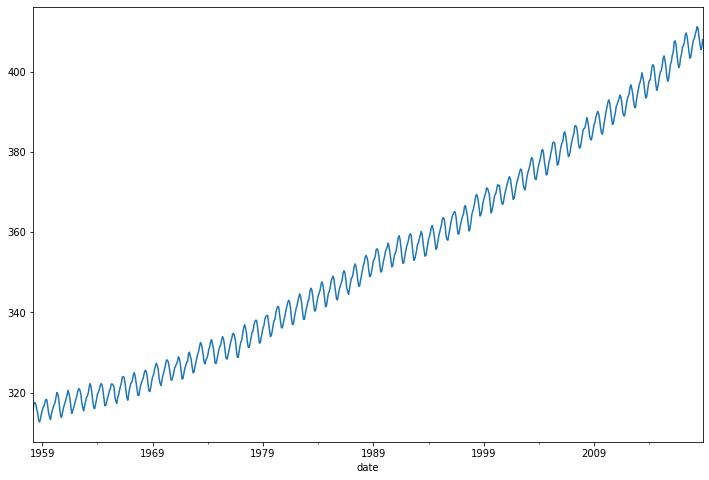

In [17]:
co2_data['interpolated'].plot(figsize=(12, 8))

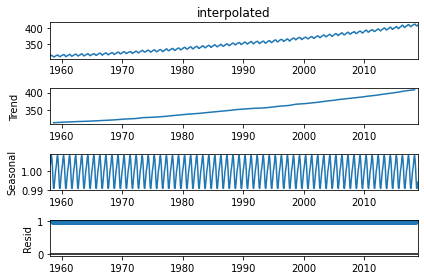

In [18]:
result = seasonal_decompose(co2_data['interpolated'], model='mul')
result.plot();

In [19]:
auto_arima(co2_data['interpolated'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.693
Date:                              Sat, 04 Sep 2021   AIC                            423.387
Time:                                      19:34:24   BIC                            450.929
Sample:                                           0   HQIC                           434.014
                                              - 729                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3549      0.034    -10.294      0.000      -0.422      -0.287
ma.L2         -0.0230      0.032     -0.712      0.476      -0.086       0.040
ma.L3         -0.0836      0.032     -2.607      0.009      -0.146      -0.021
ar.S.L12       0.9996      0.000   2988.504      0.000       0.999       1.000
ma.S.L12      -0.8666      0.021    -40.715      0.000      -0.908      -0.825
sigma2         0.0956      0.005     20.342      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 4.03
Prob(Q):                              0.77   Prob(JB):                         0.13
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
train = co2_data.iloc[:717]
test = co2_data.iloc[717:]

In [21]:
model = SARIMAX(train['interpolated'], order=(2, 1, 1), seasonal_order=(1, 0, 1, 12))

In [22]:
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.881
Date:                            Sat, 04 Sep 2021   AIC                            415.762
Time:                                    19:34:29   BIC                            443.205
Sample:                                03-01-1958   HQIC                           426.359
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3481      0.047      7.435      0.000       0.256       0.440
ar.L2          0.0837      0.025      3.365      0.001       0.035       0.132
ma.L1         -0.7023      0.035    -19.838      0.000      -0.772      -0.633
ar.S.L12       0.9996      0.000   2911.034      0.000       0.999       1.000
ma.S.L12      -0.8657      0.023    -37.990      0.000      -0.910      -0.821
sigma2         0.0953      0.005     20.662      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.68
Prob(Q):                              0.80   Prob(JB):                         0.10
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
start = len(train)
end = len(train) + len(test) - 1

In [24]:
predictions = results.predict(start, end, typ='levels').rename('SARIMA Predictions')

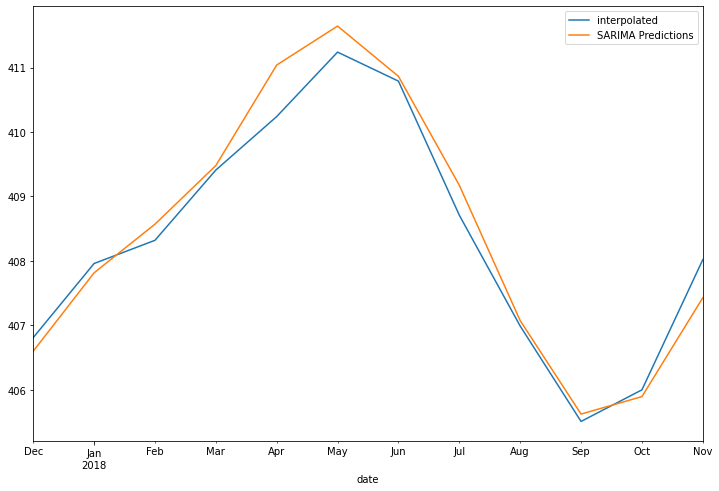

In [25]:
test['interpolated'].plot(legend=True, figsize=(12, 8))
predictions.plot(legend=True)

In [26]:
from statsmodels.tools.eval_measures import rmse

0.3 error is negligible considering mean values in test ste are around 410; therefore SARIMAX performs well here

In [27]:
error = rmse(test['interpolated'], predictions)
error

0.35788425310612526

In [28]:
test['interpolated'].mean()

408.3333333333333

Exogenous variables in regression are those which aren't affected by other variables. Endogenous variables in regression are the opposite. In more technical terms, the covariance between an exogenous variable and the random error term in regression is zero; endogenous variables are the opposite.

Ensuring variables are exogenous is key to have an unbiased ordinary least-squares regression, obviously if the error and regressor are correlated then that will make the predicted regression coefficients inaccurate. 

In the context of a multivariable time series task, exogenous variables are those whose value is determined outside of the time series model but are used for predictions within the time series model. In other words, the exogenous variable shouldn't depend on the time series.

Exogenous variables are used if they have some relation to the dataset (from an intuitive standpoint); check correlation and time series results to see if they have a strong effect on data.

An example of exogenous variables in economics would be: corn production which depends on  rainfall. To check if the variable is exogenous, ask whether a change in corn production will affect the weather? Well obviously not, so rainfall can be used as it is independent, from the model but possibly has an influence on its outputs. Consider market price however, if the supply of corn in a year greatly increases then the market price will go down, therefore market price at a large-scale turns out to be endogenous. However if you see the problem at an individual farmer's level, corn production won't affect market price so it is exogenous.

When deciding whether variables are exogenous or endogenous, context is key!

In [29]:
restaurant_data = pd.read_csv('/content/RestaurantVisitors.csv', index_col='date', parse_dates=True)
restaurant_data.index.freq = 'D'
restaurant_data.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [30]:
restaurant_data = restaurant_data.dropna()
restaurant_data.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [31]:
restaurant_data.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [32]:
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']
for col in cols:
  restaurant_data[col] = restaurant_data[col].astype(int)
restaurant_data.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


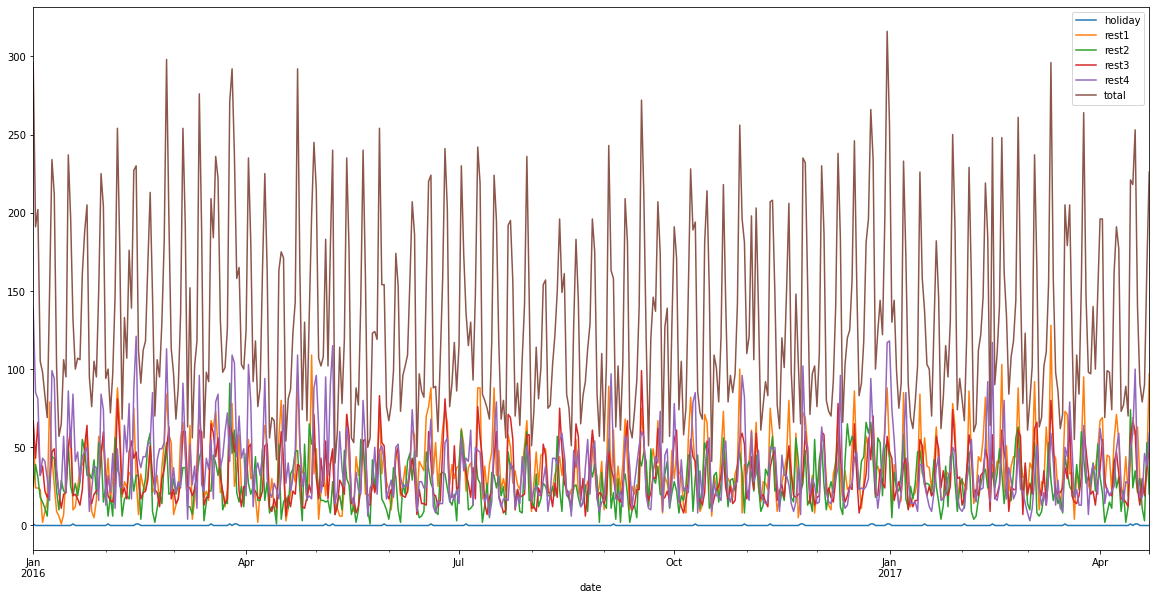

In [33]:
restaurant_data.plot(figsize=(20, 10))

View total visitors and any relation between them and the holidays to check if exogenous variable (holidays) is useful

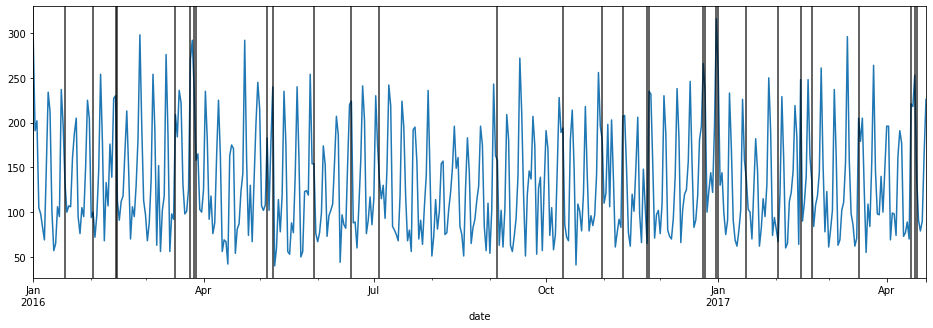

In [34]:
ax = restaurant_data['total'].plot(figsize=(16,5))
#Query index numbers where holiday occurs
for day in restaurant_data.query('holiday==1').index:
  ax.axvline(x=day, color='black', alpha=0.8);

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

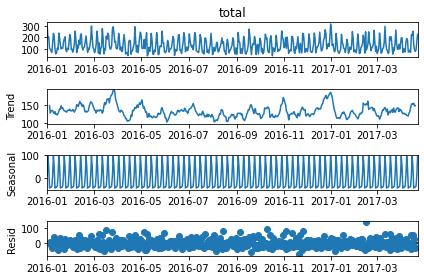

In [36]:
result = seasonal_decompose(restaurant_data['total'])
result.plot();

Weekly seasonality of dataset indicating weekends have more visitors than weekdays for the restaurant

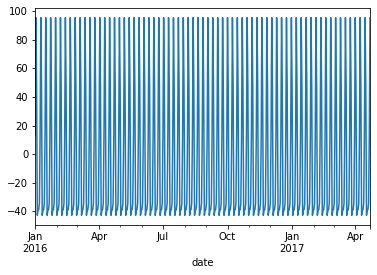

In [37]:
result.seasonal.plot()

In [38]:
train = restaurant_data.iloc[:436]
test = restaurant_data.iloc[436:]

##When selecting orders, use entire dataset then evaluate model with train, test split
auto_arima(restaurant_data['total'], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2383.845
Date:                   Sat, 04 Sep 2021   AIC                           4775.690
Time:                           19:35:11   BIC                           4792.369
Sample:                                0   HQIC                          4782.247
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7613      1.654      2.878      0.004       1.519       8.003
ar.S.L7        0.9624      0.013     75.584      0.000       0.937       0.987
ma.S.L7       -0.7581      0.048    -15.672      0.000      -0.853      -0.663
sigma2      1205.5235     70.693     17.053      0.000    1066.968    1344.079
===================================================================================
Ljung-Box (L1) (Q):                  16.20   Jarque-Bera (JB):                64.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.75
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Invertible processes adjust weights on recent observations more, whereas non-invertible processes either adjust weights equally based on all observations or on more distant observations. For a time-series model, we prefer invertible process. However statsmodels forces invertibility which can add error to training.

In [39]:
model = SARIMAX(train['total'], order=(1, 0, 0), seasonal_order=(2, 0, 0, 7),
                enforce_invertibility=False)

In [40]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Sat, 04 Sep 2021   AIC                           4457.403
Time:                                   19:35:12   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                29.23
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
start = len(train)
end = len(train) + len(test) - 1

In [42]:
predictions = result.predict(start, end).rename('SARIMA Model')

Notice that peaks of dataset correspond with holidays, therefore using it as an exogenous variable in a SARIMAX model could improve accuracy

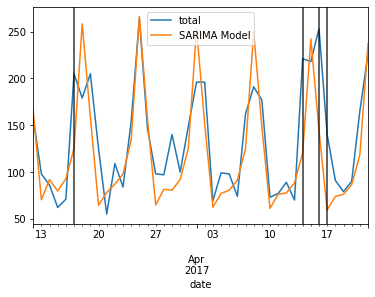

In [43]:
ax = test['total'].plot(legend=True)
predictions.plot(legend=True)

for day in test.query('holiday==1').index:
  ax.axvline(x=day, color='black', alpha=0.8);

Exogenous variable's values in prediction space must be known to prevent model from predicting two things at once which is unreliable. 

In [44]:
auto_arima(restaurant_data['total'], exogenous=restaurant_data[['holiday']], seasonal=True, m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2354.826
Date:                             Sat, 04 Sep 2021   AIC                           4721.652
Time:                                     19:43:28   BIC                           4746.669
Sample:                                 01-01-2016   HQIC                          4731.487
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.0693      2.614      6.147      0.000      10.946      21.193
holiday       44.5308      3.912     11.384      0.000      36.864      52.197
ar.L1          0.1066      0.042      2.535      0.011       0.024       0.189
ar.S.L7        0.8680      0.020     43.246      0.000       0.829       0.907
ma.S.L7       -0.3771      0.051     -7.407      0.000      -0.477      -0.277
sigma2       960.5702     60.396     15.904      0.000     842.196    1078.945
===================================================================================
Ljung-Box (L1) (Q):                   3.24   Jarque-Bera (JB):                 6.35
Prob(Q):                              0.07   Prob(JB):                         0.04
Heteroskedasticity (H):               0.90   Skew:                             0.27
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
model = SARIMAX(train['total'], exog=train[['holiday']], order=(1, 0, 1), seasonal_order=(1, 0, 1, 7), enforce_invertibility=False)
result = model.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -2127.605
Date:                           Sat, 04 Sep 2021   AIC                           4267.209
Time:                                   19:45:38   BIC                           4291.675
Sample:                               01-01-2016   HQIC                          4276.865
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       70.1807      3.723     18.851      0.000      62.884      77.477
ar.L1          0.9999      0.000   7384.106      0.000       1.000       1.000
ma.L1         -1.9093      0.058    -32.745      0.000      -2.024      -1.795
ar.S.L7        0.9998      0.000   3707.192      0.000       0.999       1.000
ma.S.L7       -1.0434      0.027    -38.946      0.000      -1.096      -0.991
sigma2       228.7888      4.132     55.370      0.000     220.690     236.887
===================================================================================
Ljung-Box (L1) (Q):                   6.43   Jarque-Bera (JB):                11.39
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.04
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

With exogenous variable, SARIMAX models those exceptions with much greater accuracy by matching peaks

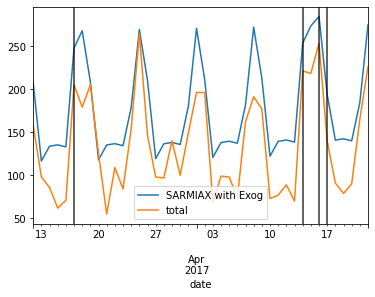

In [49]:
predictions = result.predict(start, end, exog=test[['holiday']]).rename('SARMIAX with Exog')
predictions.plot(legend=True)
ax = test['total'].plot(legend=True);

for day in test.query('holiday==1').index:
  ax.axvline(x=day, color='black', alpha=0.8);